In [1]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

**Note:** This notebook can run using TensorFlow 2.5.0

In [2]:
#!pip install tensorflow==2.5.0

In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
print(tf.__version__)

2.7.0


In [5]:

physical_devices = tf.config.list_physical_devices('GPU')
for device in physical_devices:
    tf.config.experimental.set_memory_growth(device, True)

Downloading...
From: https://drive.google.com/uc?id=1sDzcLKVZBQWeEYT101bEWCltlaFPjiIN
To: /tf/eipi10/xuxiangwen.github.io/_notes/05-ai/54-tensorflow/sequences-time-series-and-prediction/C4_W2_Assignment_Image.png
100%|███████████████████████████████████████| 18.5k/18.5k [00:00<00:00, 136kB/s]
Expected:


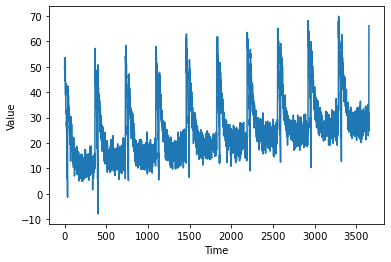

Your output:


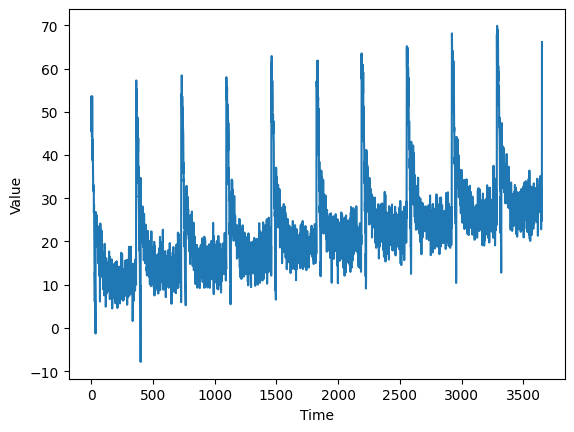

In [16]:
def plot_series(time, series, format="-", start=0, end=None):
    plt.plot(time[start:end], series[start:end], format)
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.grid(False)

def trend(time, slope=0):
    return slope * time

def seasonal_pattern(season_time):
    """Just an arbitrary pattern, you can change it if you wish"""
    return np.where(season_time < 0.1,
                    np.cos(season_time * 6 * np.pi),
                    1 / np.exp(9 * season_time))

def seasonality(time, period, amplitude=1, phase=0):
    """Repeats the same pattern at each period"""
    season_time = ((time + phase) % period) / period
    return amplitude * seasonal_pattern(season_time)

def noise(time, noise_level=1, seed=None):
    rnd = np.random.RandomState(seed)
    return rnd.randn(len(time)) * noise_level

time = np.arange(10 * 365 + 1, dtype="float32")
baseline = 10
series = trend(time, 0.1)  
baseline = 10
amplitude = 40
slope = 0.005
noise_level = 3

# Create the series
series = baseline + trend(time, slope) + seasonality(time, period=365, amplitude=amplitude)
# Update with noise
series += noise(time, noise_level, seed=51)

split_time = 3000
time_train = time[:split_time]
x_train = series[:split_time]
time_valid = time[split_time:]
x_valid = series[split_time:]

window_size = 20
batch_size = 32
shuffle_buffer_size = 1000

# # # # # expected output  
# !pip install gdown 
!gdown --id 1sDzcLKVZBQWeEYT101bEWCltlaFPjiIN
print("Expected:")
from IPython.display import display
from PIL import Image
path='./C4_W2_Assignment_Image.png'
display(Image.open(path))
# # # # #

### your output
print("Your output:")
plot_series(time, series)
plt.show()

In [17]:
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
    dataset = tf.data.Dataset.from_tensor_slices(series)
    dataset = dataset.window(window_size + 1, shift=1, drop_remainder=True)
    dataset = dataset.flat_map(lambda window: window.batch(window_size + 1))
    dataset = dataset.shuffle(shuffle_buffer).map(lambda window: (window[:-1], window[-1]))
    dataset = dataset.batch(batch_size).prefetch(1)
    return dataset

In [27]:
dataset = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)
val_dataset = windowed_dataset(x_valid, window_size, batch_size, shuffle_buffer_size)

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(100, input_shape=[window_size], activation="relu"), # YOUR CODE HERE #),
    tf.keras.layers.Dense(10, activation="relu"), # YOUR CODE HERE #, activation="relu"), 
    tf.keras.layers.Dense(1)
])

model.compile(loss="mse", optimizer=tf.keras.optimizers.SGD(learning_rate=1e-6, momentum=0.9))# YOUR CODE HERE #, optimizer=# YOUR CODE HERE#))
history = model.fit(dataset,epochs=500, validation_data = val_dataset) 


Epoch 1/500
94/94 [==============================] - 1s 6ms/step - loss: 97.7924 - val_loss: 25.7820
Epoch 2/500
94/94 [==============================] - 0s 4ms/step - loss: 30.2793 - val_loss: 24.8176
Epoch 3/500
94/94 [==============================] - 1s 4ms/step - loss: 27.8377 - val_loss: 23.3715
Epoch 4/500
94/94 [==============================] - 1s 4ms/step - loss: 26.6111 - val_loss: 22.4564
Epoch 5/500
94/94 [==============================] - 1s 4ms/step - loss: 26.2331 - val_loss: 23.1525
Epoch 6/500
94/94 [==============================] - 1s 4ms/step - loss: 25.1531 - val_loss: 21.8856
Epoch 7/500
94/94 [==============================] - 1s 4ms/step - loss: 24.6678 - val_loss: 21.7397
Epoch 8/500
94/94 [==============================] - 1s 4ms/step - loss: 24.2599 - val_loss: 21.7520
Epoch 9/500
94/94 [==============================] - 1s 4ms/step - loss: 23.8612 - val_loss: 21.3413
Epoch 10/500
94/94 [==============================] - 1s 4ms/step - loss: 23.5477 - val_los

94/94 [==============================] - 1s 4ms/step - loss: 19.7735 - val_loss: 19.1650
Epoch 82/500
94/94 [==============================] - 1s 5ms/step - loss: 19.8739 - val_loss: 19.1544
Epoch 83/500
94/94 [==============================] - 1s 4ms/step - loss: 19.7682 - val_loss: 20.3227
Epoch 84/500
94/94 [==============================] - 1s 4ms/step - loss: 19.7557 - val_loss: 19.1222
Epoch 85/500
94/94 [==============================] - 1s 4ms/step - loss: 19.8551 - val_loss: 19.8143
Epoch 86/500
94/94 [==============================] - 1s 4ms/step - loss: 19.7318 - val_loss: 19.2479
Epoch 87/500
94/94 [==============================] - 1s 4ms/step - loss: 19.7392 - val_loss: 19.5422
Epoch 88/500
94/94 [==============================] - 1s 4ms/step - loss: 19.7900 - val_loss: 19.8910
Epoch 89/500
94/94 [==============================] - 1s 4ms/step - loss: 19.7086 - val_loss: 19.1553
Epoch 90/500
94/94 [==============================] - 1s 4ms/step - loss: 19.7493 - val_loss: 1

Epoch 161/500
94/94 [==============================] - 1s 5ms/step - loss: 19.0398 - val_loss: 18.7358
Epoch 162/500
94/94 [==============================] - 1s 5ms/step - loss: 19.1462 - val_loss: 18.6878
Epoch 163/500
94/94 [==============================] - 1s 4ms/step - loss: 19.1047 - val_loss: 19.8814
Epoch 164/500
94/94 [==============================] - 1s 5ms/step - loss: 18.9040 - val_loss: 18.7113
Epoch 165/500
94/94 [==============================] - 1s 5ms/step - loss: 19.0654 - val_loss: 18.6535
Epoch 166/500
94/94 [==============================] - 1s 4ms/step - loss: 18.9864 - val_loss: 18.9685
Epoch 167/500
94/94 [==============================] - 1s 4ms/step - loss: 19.0233 - val_loss: 18.9416
Epoch 168/500
94/94 [==============================] - 1s 4ms/step - loss: 18.9639 - val_loss: 18.7060
Epoch 169/500
94/94 [==============================] - 1s 4ms/step - loss: 18.9093 - val_loss: 18.6230
Epoch 170/500
94/94 [==============================] - 1s 4ms/step - loss

94/94 [==============================] - 1s 4ms/step - loss: 18.2654 - val_loss: 18.2764
Epoch 241/500
94/94 [==============================] - 1s 4ms/step - loss: 18.3211 - val_loss: 18.3655
Epoch 242/500
94/94 [==============================] - 1s 4ms/step - loss: 18.3187 - val_loss: 18.3930
Epoch 243/500
94/94 [==============================] - 1s 4ms/step - loss: 18.4940 - val_loss: 18.3997
Epoch 244/500
94/94 [==============================] - 0s 4ms/step - loss: 18.2215 - val_loss: 18.1831
Epoch 245/500
94/94 [==============================] - 0s 4ms/step - loss: 18.4385 - val_loss: 18.3419
Epoch 246/500
94/94 [==============================] - 1s 4ms/step - loss: 18.2245 - val_loss: 18.3104
Epoch 247/500
94/94 [==============================] - 1s 4ms/step - loss: 18.2244 - val_loss: 18.2873
Epoch 248/500
94/94 [==============================] - 1s 4ms/step - loss: 18.3210 - val_loss: 18.3002
Epoch 249/500
94/94 [==============================] - 1s 4ms/step - loss: 18.2220 - va

94/94 [==============================] - 1s 5ms/step - loss: 17.7564 - val_loss: 18.2625
Epoch 320/500
94/94 [==============================] - 0s 4ms/step - loss: 17.8060 - val_loss: 17.9505
Epoch 321/500
94/94 [==============================] - 1s 4ms/step - loss: 17.8767 - val_loss: 18.0102
Epoch 322/500
94/94 [==============================] - 0s 4ms/step - loss: 17.7372 - val_loss: 18.3441
Epoch 323/500
94/94 [==============================] - 1s 4ms/step - loss: 17.8464 - val_loss: 17.9637
Epoch 324/500
94/94 [==============================] - 1s 4ms/step - loss: 17.7423 - val_loss: 17.9570
Epoch 325/500
94/94 [==============================] - 0s 4ms/step - loss: 17.7907 - val_loss: 18.5154
Epoch 326/500
94/94 [==============================] - 0s 4ms/step - loss: 17.7078 - val_loss: 18.0769
Epoch 327/500
94/94 [==============================] - 1s 4ms/step - loss: 17.6803 - val_loss: 18.3126
Epoch 328/500
94/94 [==============================] - 0s 4ms/step - loss: 17.7864 - va

94/94 [==============================] - 0s 4ms/step - loss: 17.3959 - val_loss: 18.8906
Epoch 399/500
94/94 [==============================] - 1s 4ms/step - loss: 17.2315 - val_loss: 17.6158
Epoch 400/500
94/94 [==============================] - 0s 4ms/step - loss: 17.2868 - val_loss: 17.5699
Epoch 401/500
94/94 [==============================] - 0s 4ms/step - loss: 17.3294 - val_loss: 21.5213
Epoch 402/500
94/94 [==============================] - 1s 4ms/step - loss: 17.2312 - val_loss: 17.6631
Epoch 403/500
94/94 [==============================] - 1s 4ms/step - loss: 17.3163 - val_loss: 18.0383
Epoch 404/500
94/94 [==============================] - 0s 4ms/step - loss: 17.2500 - val_loss: 17.6204
Epoch 405/500
94/94 [==============================] - 0s 4ms/step - loss: 17.3033 - val_loss: 19.7100
Epoch 406/500
94/94 [==============================] - 0s 4ms/step - loss: 17.1394 - val_loss: 18.3188
Epoch 407/500
94/94 [==============================] - 0s 4ms/step - loss: 17.1729 - va

94/94 [==============================] - 1s 4ms/step - loss: 16.9226 - val_loss: 18.8220
Epoch 478/500
94/94 [==============================] - 1s 4ms/step - loss: 16.8560 - val_loss: 17.6699
Epoch 479/500
94/94 [==============================] - 0s 4ms/step - loss: 17.0321 - val_loss: 17.9179
Epoch 480/500
94/94 [==============================] - 1s 5ms/step - loss: 17.2661 - val_loss: 17.6519
Epoch 481/500
94/94 [==============================] - 1s 4ms/step - loss: 16.9160 - val_loss: 18.1664
Epoch 482/500
94/94 [==============================] - 0s 4ms/step - loss: 16.8529 - val_loss: 17.4246
Epoch 483/500
94/94 [==============================] - 1s 4ms/step - loss: 17.0197 - val_loss: 18.2690
Epoch 484/500
94/94 [==============================] - 1s 4ms/step - loss: 16.8423 - val_loss: 17.6459
Epoch 485/500
94/94 [==============================] - 0s 4ms/step - loss: 16.8986 - val_loss: 17.4087
Epoch 486/500
94/94 [==============================] - 0s 4ms/step - loss: 16.9517 - va

In [28]:
def plot_history(history, start_epoch=None, end_epoch=None):
    if start_epoch is None:
        start_epoch = 0
    if end_epoch is None:
        end_epoch = len(history.history['loss'])       
            
    max_epoch = min(len(history.history['loss']), end_epoch)
    loss = history.history['loss'][start_epoch:end_epoch]
    val_loss = history.history['val_loss'][start_epoch:end_epoch]
    
    plt.figure(figsize=(8, 5))
    epochs = range(start_epoch, max_epoch)
    if max_epoch <= 20:
        xticks = range(start_epoch, max_epoch)
    else:
        xticks = range(start_epoch, max_epoch, (max_epoch-1)//20+10)

    plt.plot(epochs, loss)
    plt.plot(epochs, val_loss)
    plt.title('Loss vs. epochs')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.xticks(xticks)
    plt.legend(['Training', 'Validation'], loc='upper right')
    plt.show()

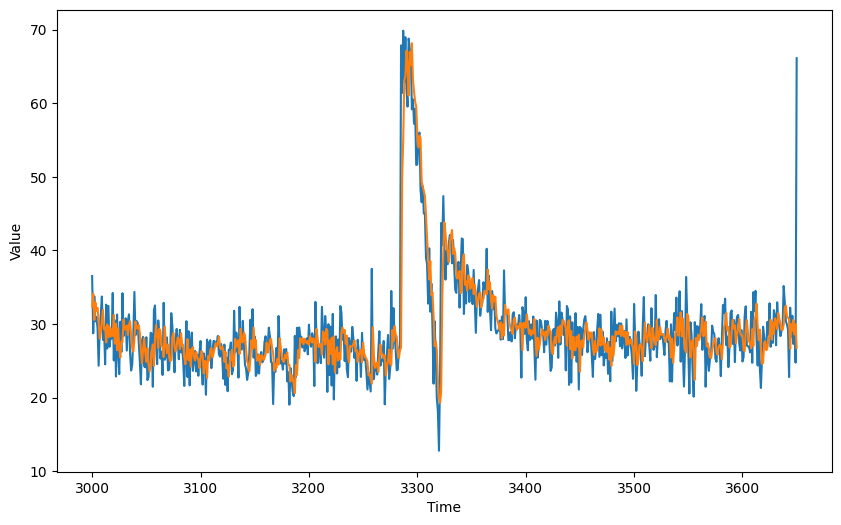

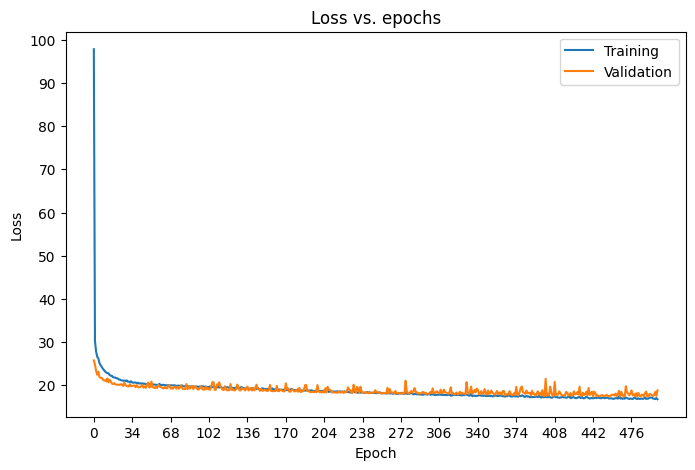

In [29]:
plot_history(history)

In [30]:
forecast = []
for time in range(len(series) - window_size):
    forecast.append(model.predict(series[time:time + window_size][np.newaxis]))

forecast = forecast[split_time-window_size:]
results = np.array(forecast)[:, 0, 0]


plt.figure(figsize=(10, 6))

plot_series(time_valid, x_valid)
plot_series(time_valid, results)

In [31]:
print(tf.keras.metrics.mean_squared_error(x_valid, results).numpy())
print(tf.keras.metrics.mean_absolute_error(x_valid, results).numpy()) 

# EXPECTED OUTPUT
# A Value less than 3

18.71265
2.937428
